# Women in Comic Books

Predicting the Prominence of Female Heroes in the future

## Load Libraries 

In [19]:
#Import Python Libraries
import pandas as pd
import matplotlib.pyplot as pyplot 
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics
from sklearn import preprocessing
import numpy as np

## Import Data Sets 

In [ ]:
#Read csv file
marvel = pd.read_csv('../data/marvel-wikia-data.csv')

In [ ]:
#Read csv file
dc = pd.read_csv("../data/dc-wikia-data.csv")

In [ ]:
# Reset marvel year column to all caps YEAR so to keep the column names cohesive
marvel['YEAR'] = marvel['Year']

## Setting new Data frames

In [ ]:
# Marvel DataFrame with name, ID, Alignment, eye color, hair color, sex, alive status, appearances, and year
marvel = pd.DataFrame(marvel, columns = ['name' , 'SEX', 'APPEARANCES', 'EYE', 'YEAR'])

# Create a new column named Universe and set all the column to DC
marvel['Universe'] = 'Marvel'

marvel.head()

In [ ]:
# DC DataFrame with name, ID, Alignment, eye color, hair color, sex, alive status, appearances, and year
dc = pd.DataFrame(dc, columns = ['name' , 'SEX', 'APPEARANCES', 'EYE','YEAR'])

# Create a new column named Universe and set all the column to DC
dc['Universe'] = 'DC'
dc.head()

## Making one large Data frame

In [ ]:
# ignore_index means it will reassign new indexes
comicCharacters = pd.concat([marvel, dc], ignore_index = True, sort = False)

In [ ]:
# Get a dataframe with only female heroes indexes  
femaleComicCharacters = comicCharacters[comicCharacters['SEX'] ==  'Female Characters']
femaleComicCharacters.dropna(subset = ['YEAR'], inplace=True) 
femaleComicCharacters.dropna(subset = ['EYE'], inplace=True) 
femaleComicCharacters.head()

In [ ]:
#Counting the number of eye colors
femaleEyeCount = femaleComicCharacters['EYE'].value_counts()

In [ ]:
femaleComicCharacters['YEAR'].astype(str)

In [ ]:
# setting the year as a whole number 
years = pd.to_numeric(femaleComicCharacters['YEAR']).notnull()
femaleComicCharacters['YEAR'].loc[years] = femaleComicCharacters['YEAR'].loc[years].astype(int)
femaleComicCharacters.head()

In [ ]:
#femaleComicCharacters['year'] = pd.to_datetime(femaleComicCharacters['YEAR']) + pd.to_timedelta(np.arange(10), 'D')

## Organizing the Data frame

In [ ]:
# Sort the rows of comicCharacters by column 'Year'
femaleComicCharacters = femaleComicCharacters.sort_values(by ='YEAR' )
print("Contents of Sorted Dataframe based on a single column 'YEAR' : ")
femaleComicCharacters.head()

## Setting the Time Series

In [ ]:
# ploting the data to get a feel for it
pyplot.plot(femaleComicCharacters['YEAR'], femaleComicCharacters['APPEARANCES'])
pyplot.show()

In [ ]:
# Now to eneact Differencing so to balance the data 
diffFemaleCC = femaleComicCharacters['APPEARANCES'].diff()
pyplot.plot(femaleComicCharacters['YEAR'], diffFemaleCC)
pyplot.show()

### The above graph is showing that the data is more stationary after the differenecing

## Modeling the Time Series

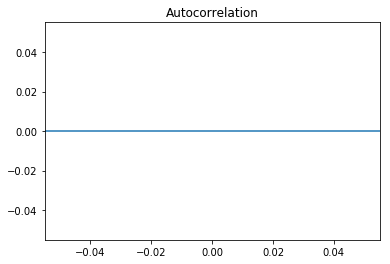

In [27]:
# using the ARIMA
# ACF plot
plot_acf(diffFemaleCC)
pyplot.show()

KeyboardInterrupt: 

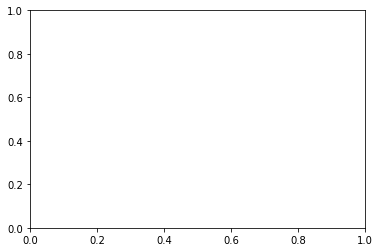

In [28]:
# PACF plot
plot_pacf(diffFemaleCC)
pyplot.show()

In [ ]:
# Try the ARIMA modeleing
ARMA_model = ARIMA(diffFemaleCC, order(5,2,1).fit(transparams=False))

In [ ]:
# The predition model based off the above model
ARMA_predict = ARMA_model.predict()